<a href="https://colab.research.google.com/github/JatinK169/MRM_TaskPhase/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, log_loss

data mounting

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


reading the data

In [68]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [72]:
test.drop("Cabin",inplace = True,axis = 1)

In [73]:
test.shape

(418, 10)

In [74]:
test.drop(['PassengerId','Name','Ticket'],inplace = True,axis = 1)

In [87]:
test.drop("Embarked",inplace = True,axis=1)

In [100]:
test.drop("Fare",inplace=True,axis=1)

In [101]:
test.shape

(418, 5)

In [102]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,887
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,888
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,889
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,890


In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
train[train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


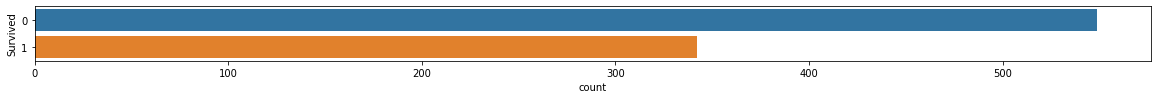

In [8]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

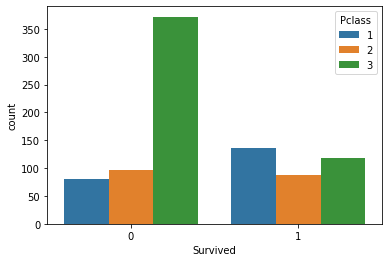

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train)

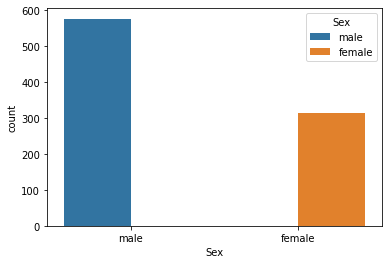

In [7]:
sns.countplot(x='Sex',hue='Sex',data=train)

In [8]:
pd.get_dummies(train["Sex"]).head()
pd.get_dummies(test["Sex"]).head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [9]:
train["Age"].mean()

29.69911764705882

substituing avg age value=29.25 to null age value

In [10]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)
test["Age"] = test[["Age", "Pclass"]].apply(add_age,axis=1)
train.Age.isnull().sum()

0

In [108]:
pd.get_dummies(test["Sex"]).head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [116]:
test['Sex'] = np.where(test['Sex'] == 'female', 1, 0)

In [61]:
test.shape

(418, 7)

In [117]:
test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0,34.5,0,0
1,3,1,47.0,1,0
2,2,0,62.0,0,0
3,3,0,27.0,0,0
4,3,1,22.0,1,1


In [85]:
print(len(train))
train['Embarked']=train.dropna(subset=['Embarked'])

print(len(train))
train.Pclass.isnull().sum()

891
891


0

In [12]:
train.Pclass.isnull().sum()
test.Pclass.isnull().sum()

0

creating a subset data frame required for training dataset for calculation

In [20]:
df_bin =pd.DataFrame()
df_bin['Survived'] = train['Survived']
df_bin['Pclass'] = train['Pclass']
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_bin['Age']=train['Age']
df_bin['SibSp'] = train['SibSp']
df_bin['Parch'] = train['Parch']
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [81]:
df_bin.shape

(891, 6)

In [86]:
test.shape

(418, 7)

In [14]:
X=df_bin.drop("Survived",axis = 1)
y=df_bin['Survived']

In [31]:
from sklearn.model_selection import train_test_split
xt, xtest, yt, ytest = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xt,yt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
prediction=lr.predict(xt)
from sklearn.metrics import classification_report
print(classification_report(yt, prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       395
           1       0.78      0.70      0.74       228

    accuracy                           0.82       623
   macro avg       0.81      0.80      0.80       623
weighted avg       0.82      0.82      0.82       623



In [40]:
prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

building the logistic function

In [38]:
from numpy import log, dot, e
def sigmoid(Z):
    return 1/(1+np.exp(-Z))


In [43]:
def optimize(x, y,learning_rate,iterations,parameters):
    size = x.shape[0]
    weight = parameters["weight"] 
    bias = parameters["bias"]
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weight -= learning_rate * dW
        bias -= learning_rate * db 
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters

In [132]:
IP_para = {} 
IP_para["weight"] = np.zeros(xt.shape[1])
IP_para["bias"] = 0

In [131]:
def train(x, y, learning_rate,iterations):
    para_out = optimize(x, y, learning_rate, iterations ,IP_para)
    return para_out

In [130]:
para_out = train(xt, yt, learning_rate = 0.001, iterations = 10000)
para_out

{'bias': 0.4272064855477391,
 'weight': array([-0.66158681,  2.13562623, -0.01102826, -0.17632949,  0.06614574])}

In [129]:
op_values = np.dot(test, para_out["weight"]) + para_out["bias"]
predictions = sigmoid(op_values) >= 1/2
predictions

array([False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False,

In [125]:
accuracy_score(yt,prediction)

0.8202247191011236

In [122]:
log_loss(yt,prediction)

6.209274700669222